In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from mplsoccer.pitch  import Pitch
from sklearn.cluster import KMeans

In [4]:
df =pd.read_csv(r'C:\Users\SG\Downloads\kmeanstutorial.csv')

In [5]:
df

,Unnamed: 0,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,counterpress,dribble_outcome,dribble_overrun,duel_outcome,...,shot_statsbomb_xg,shot_technique,shot_type,substitution_outcome,substitution_replacement,tactics,team,timestamp,type,under_pressure
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 442, 'lineup': [{'player': {'id'...",France,00:00:00.000,Starting XI,NaN
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,"{'formation': 433, 'lineup': [{'player': {'id'...",Croatia,00:00:00.000,Starting XI,NaN
2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,France,00:00:00.000,Half Start,NaN
3,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Croatia,00:00:00.000,Half Start,NaN
4,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Croatia,00:00:00.000,Half Start,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2973,2973,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Tactical,Corentin Tolisso,NaN,France,00:27:51.840,Substitution,NaN
2974,2974,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Tactical,Marko Pjaca,NaN,Croatia,00:35:50.467,Substitution,NaN
2975,2975,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,Tactical,Nabil Fekir,NaN,France,00:35:57.787,Substitution,NaN
2976,2976,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,France,00:23:08.400,Error,NaN


In [6]:
df.columns

Index(['Unnamed: 0', 'ball_receipt_outcome', 'ball_recovery_recovery_failure',
       'block_deflection', 'carry_end_location', 'clearance_aerial_won',
       'counterpress', 'dribble_outcome', 'dribble_overrun', 'duel_outcome',
       'duel_type', 'duration', 'foul_committed_advantage',
       'foul_committed_card', 'foul_committed_penalty', 'foul_committed_type',
       'foul_won_advantage', 'foul_won_defensive', 'goalkeeper_body_part',
       'goalkeeper_end_location', 'goalkeeper_outcome', 'goalkeeper_position',
       'goalkeeper_technique', 'goalkeeper_type', 'id', 'index',
       'injury_stoppage_in_chain', 'interception_outcome', 'location',
       'match_id', 'minute', 'pass_aerial_won', 'pass_angle',
       'pass_assisted_shot_id', 'pass_backheel', 'pass_body_part',
       'pass_cross', 'pass_cut_back', 'pass_deflected', 'pass_end_location',
       'pass_goal_assist', 'pass_height', 'pass_length', 'pass_outcome',
       'pass_recipient', 'pass_shot_assist', 'pass_switch', 'pa

In [9]:
df= df[['team','type','location','pass_end_location']]
df

,team,type,location,pass_end_location
0,France,Starting XI,NaN,NaN
1,Croatia,Starting XI,NaN,NaN
2,France,Half Start,NaN,NaN
3,Croatia,Half Start,NaN,NaN
4,Croatia,Half Start,NaN,NaN
...,...,...,...,...
2973,France,Substitution,NaN,NaN
2974,Croatia,Substitution,NaN,NaN
2975,France,Substitution,NaN,NaN
2976,France,Error,"[6.0, 36.0]",NaN


In [12]:
df =df [(df['team']=='France')& (df['type']=='Pass')].reset_index()

In [13]:
df

,index,team,type,location,pass_end_location
0,11,France,Pass,"[48.0, 50.0]","[48.0, 60.0]"
1,24,France,Pass,"[49.0, 80.0]","[46.0, 61.0]"
2,25,France,Pass,"[65.0, 64.0]","[66.0, 69.0]"
3,28,France,Pass,"[63.0, 73.0]","[65.0, 79.0]"
4,29,France,Pass,"[58.0, 79.0]","[26.0, 69.0]"
...,...,...,...,...,...
287,837,France,Pass,"[34.0, 47.0]","[36.0, 42.0]"
288,842,France,Pass,"[15.0, 79.0]","[63.0, 79.0]"
289,845,France,Pass,"[70.0, 58.0]","[97.0, 66.0]"
290,847,France,Pass,"[31.0, 61.0]","[68.0, 80.0]"


In [14]:
df[['x','y']]=df.location.str.split(expand=True)
df[['endx','endy']]=df.pass_end_location.str.split(expand=True)

In [15]:
df

,index,team,type,location,pass_end_location,x,y,endx,endy
0,11,France,Pass,"[48.0, 50.0]","[48.0, 60.0]","[48.0,",50.0],"[48.0,",60.0]
1,24,France,Pass,"[49.0, 80.0]","[46.0, 61.0]","[49.0,",80.0],"[46.0,",61.0]
2,25,France,Pass,"[65.0, 64.0]","[66.0, 69.0]","[65.0,",64.0],"[66.0,",69.0]
3,28,France,Pass,"[63.0, 73.0]","[65.0, 79.0]","[63.0,",73.0],"[65.0,",79.0]
4,29,France,Pass,"[58.0, 79.0]","[26.0, 69.0]","[58.0,",79.0],"[26.0,",69.0]
...,...,...,...,...,...,...,...,...,...
287,837,France,Pass,"[34.0, 47.0]","[36.0, 42.0]","[34.0,",47.0],"[36.0,",42.0]
288,842,France,Pass,"[15.0, 79.0]","[63.0, 79.0]","[15.0,",79.0],"[63.0,",79.0]
289,845,France,Pass,"[70.0, 58.0]","[97.0, 66.0]","[70.0,",58.0],"[97.0,",66.0]
290,847,France,Pass,"[31.0, 61.0]","[68.0, 80.0]","[31.0,",61.0],"[68.0,",80.0]


In [16]:
df['x'] = df.loc[:,'x'] = df.x.map(lambda x: x[1:-1]).astype(float)
df['y'] = df.loc[:,'y'] = df.y.map(lambda x: x[0:-1]).astype(float)
df['endx'] = df.loc[:,'endx'] = df.endx.map(lambda x: x[1:-1]).astype(float)
df['endy'] = df.loc[:,'endy'] = df.endy.map(lambda x: x[0:-1]).astype(float)

In [17]:
df=df.drop(['location','pass_end_location'],axis=1)

In [18]:
df

,index,team,type,x,y,endx,endy
0,11,France,Pass,48.0,50.0,48.0,60.0
1,24,France,Pass,49.0,80.0,46.0,61.0
2,25,France,Pass,65.0,64.0,66.0,69.0
3,28,France,Pass,63.0,73.0,65.0,79.0
4,29,France,Pass,58.0,79.0,26.0,69.0
...,...,...,...,...,...,...,...
287,837,France,Pass,34.0,47.0,36.0,42.0
288,842,France,Pass,15.0,79.0,63.0,79.0
289,845,France,Pass,70.0,58.0,97.0,66.0
290,847,France,Pass,31.0,61.0,68.0,80.0


In [20]:
X=np.array(df[['x','y','endx','endy']])

kmeans= KMeans(n_clusters=10 , random_state=100)
kmeans.fit(X)
df['clusters']=kmeans.predict(X)

df

,index,team,type,x,y,endx,endy,clusters
0,11,France,Pass,48.0,50.0,48.0,60.0,1
1,24,France,Pass,49.0,80.0,46.0,61.0,1
2,25,France,Pass,65.0,64.0,66.0,69.0,3
3,28,France,Pass,63.0,73.0,65.0,79.0,1
4,29,France,Pass,58.0,79.0,26.0,69.0,1
...,...,...,...,...,...,...,...,...
287,837,France,Pass,34.0,47.0,36.0,42.0,8
288,842,France,Pass,15.0,79.0,63.0,79.0,1
289,845,France,Pass,70.0,58.0,97.0,66.0,3
290,847,France,Pass,31.0,61.0,68.0,80.0,1


In [22]:
df.clusters.value_counts()

8    39
6    38
1    36
3    36
0    31
2    28
5    27
9    24
7    18
4    15
Name: clusters, dtype: int64

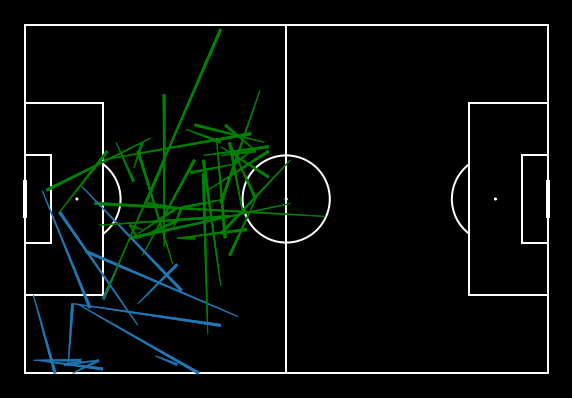

In [31]:
fig, ax= plt.subplots(figsize=(10,10))
fig.set_facecolor('black')
ax.patch.set_facecolor('black')

pitch=Pitch(pitch_type='statsbomb', orientation='horizontal',pitch_color='black',line_color='white',figsize=10, 
           constrained_layout=False,tight_layout=True, view='full')
pitch.draw(ax=ax)

for x in range(len(df['clusters'])):
    if df['clusters'][x] ==8 :
        pitch.lines(xstart=df['x'][x],ystart=df['y'][x],xend=df['endx'][x],yend=df['endy'][x],color='green',lw=3,zorder=2,comet=True,ax=ax)
    if df['clusters'][x] ==4 :
        pitch.lines(xstart=df['x'][x],ystart=df['y'][x],xend=df['endx'][x],yend=df['endy'][x],lw=3,zorder=2,comet=True,ax=ax)